In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
import re
from geopy.geocoders import Nominatim
from geopy import distance
import holidays

In [2]:
completed_orders = pd.read_csv('../data/nb.csv')
delivery_requests = pd.read_csv('../data/driver_locations_during_request.csv')

In [3]:
delivery_requests.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [4]:
delivery_requests.shape

(1557740, 8)

In [5]:
delivery_requests.isna().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

delete the columns created_at and updated_at because there is no data found in them

In [6]:
delivery_requests.drop(columns=['created_at'], inplace=True)
delivery_requests.drop(columns=['updated_at'], inplace=True)

In [7]:
delivery_requests.isna().sum()

id               0
order_id         0
driver_id        0
driver_action    0
lat              0
lng              0
dtype: int64

In [8]:
grouped_delivery=delivery_requests.groupby(["order_id","driver_id","driver_action"],as_index=False).size()
grouped_delivery.head()

,order_id,driver_id,driver_action,size
0,392001,171651,rejected,1
1,392001,171653,rejected,1
2,392001,226949,rejected,1
3,392001,243539,rejected,1
4,392001,243588,rejected,1


In [9]:
grouped_delivery_new=grouped_delivery.groupby(["order_id","driver_action"],as_index=False).size()


grouped_delivery_new.rename(columns={"size":"count"},inplace=True)
grouped_delivery_new.head()


,order_id,driver_action,count
0,392001,accepted,1
1,392001,rejected,9
2,392005,accepted,1
3,392005,rejected,17
4,392009,accepted,1


In [12]:
accepted_orders=grouped_delivery_new[grouped_delivery_new["driver_action"]=="accepted"]
rejected_orders=grouped_delivery_new[~grouped_delivery_new.order_id.isin(accepted_orders.order_id)]

In [13]:
accepted_orders.head()

,order_id,driver_action,count
0,392001,accepted,1
2,392005,accepted,1
4,392009,accepted,1
6,392013,accepted,1
8,392014,accepted,1


In [14]:
rejected_orders.head()

,order_id,driver_action,count
1216,393128,rejected,32
1269,393177,rejected,16
1407,393291,rejected,2
1917,393737,rejected,9
1990,393809,rejected,14


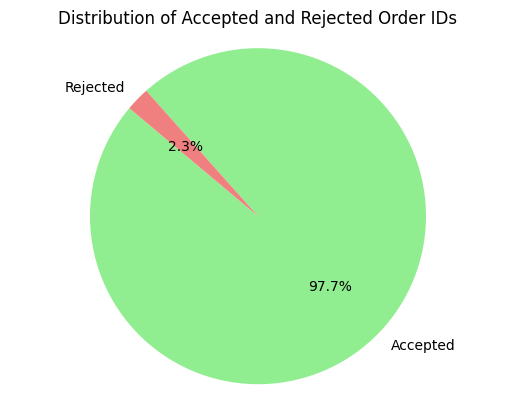

In [17]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrames accepted_orders and rejected_orders as shown in your example

# Counting the number of unique order IDs for accepted and rejected orders
accepted_order_count = accepted_orders['order_id'].nunique()
rejected_order_count = rejected_orders['order_id'].nunique()

# Pie chart labels
labels = ['Accepted', 'Rejected']

# Pie chart data
sizes = [accepted_order_count, rejected_order_count]

# Pie chart colors
colors = ['lightgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adding a title
plt.title('Distribution of Accepted and Rejected Order IDs')

# Show plot
plt.show()


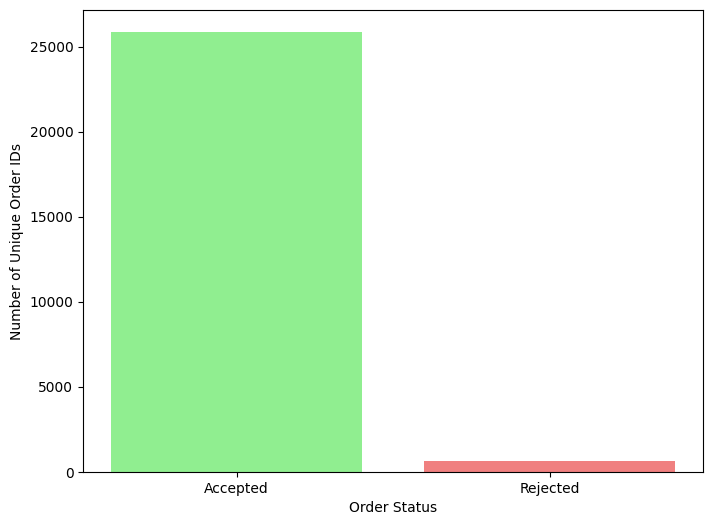

In [19]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrames accepted_orders and rejected_orders as shown in your example

# Counting the number of unique order IDs for accepted and rejected orders
accepted_order_count = accepted_orders['order_id'].nunique()
rejected_order_count = rejected_orders['order_id'].nunique()

# Bar chart labels
labels = ['Accepted', 'Rejected']

# Bar chart data
counts = [accepted_order_count, rejected_order_count]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['lightgreen', 'lightcoral'])

# Adding labels and title
plt.xlabel('Order Status')
plt.ylabel('Number of Unique Order IDs')
plt.show()
